# NLP for payments acts from different countries 

# DATA PRE PROCESSING

US REGULATION

In [3]:
import os
os.environ["USE_TF"] = "0"

In [4]:
import fitz  
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Increase spaCy's max_length limit
nlp.max_length = 3_000_000

# Extract text from the PDF using PyMuPDF
doc = fitz.open(r"fintech_laws\USA.pdf")
text = "\n".join([page.get_text() for page in doc])
doc.close()

# Tokenization using spaCy
doc = nlp(text)
tokens = [token.text for token in doc]

# Print tokens
print(tokens[:1000])

['PUBLIC', 'LAW', '111–203', '—', 'JULY', '21', ',', '2010', '\n', 'DODD', '-', 'FRANK', 'WALL', 'STREET', 'REFORM', 'AND', '\n', 'CONSUMER', 'PROTECTION', 'ACT', '\n', 'VerDate', 'Nov', '24', '2008', '\n', '00:54', 'Jul', '29', ',', '2010', '\n', 'Jkt', '089139', '\n', 'PO', '00203', '\n', 'Frm', '00001', '\n', 'Fmt', '6579', '\n', 'Sfmt', '6579', '\n', 'E:\\PUBLAW\\PUBL203.111', '\n', 'GPO1', '\n', 'PsN', ':', 'PUBL203', '\n', 'anorris', 'on', 'DSK5R6SHH1PROD', 'with', 'PUBLIC', 'LAWS', '\n\n', '124', 'STAT', '.', '1376', '\n', 'PUBLIC', 'LAW', '111–203', '—', 'JULY', '21', ',', '2010', '\n', 'Public', 'Law', '111–203', '\n', '111th', 'Congress', '\n', 'An', 'Act', '\n', 'To', 'promote', 'the', 'financial', 'stability', 'of', 'the', 'United', 'States', 'by', 'improving', 'accountability', '\n', 'and', 'transparency', 'in', 'the', 'financial', 'system', ',', 'to', 'end', '‘', '‘', 'too', 'big', 'to', 'fail', '’’', ',', 'to', 'protect', '\n', 'the', 'American', 'taxpayer', 'by', 'endin

In [5]:
# tokens as string
print([token.text for token in doc][:1000])

['PUBLIC', 'LAW', '111–203', '—', 'JULY', '21', ',', '2010', '\n', 'DODD', '-', 'FRANK', 'WALL', 'STREET', 'REFORM', 'AND', '\n', 'CONSUMER', 'PROTECTION', 'ACT', '\n', 'VerDate', 'Nov', '24', '2008', '\n', '00:54', 'Jul', '29', ',', '2010', '\n', 'Jkt', '089139', '\n', 'PO', '00203', '\n', 'Frm', '00001', '\n', 'Fmt', '6579', '\n', 'Sfmt', '6579', '\n', 'E:\\PUBLAW\\PUBL203.111', '\n', 'GPO1', '\n', 'PsN', ':', 'PUBL203', '\n', 'anorris', 'on', 'DSK5R6SHH1PROD', 'with', 'PUBLIC', 'LAWS', '\n\n', '124', 'STAT', '.', '1376', '\n', 'PUBLIC', 'LAW', '111–203', '—', 'JULY', '21', ',', '2010', '\n', 'Public', 'Law', '111–203', '\n', '111th', 'Congress', '\n', 'An', 'Act', '\n', 'To', 'promote', 'the', 'financial', 'stability', 'of', 'the', 'United', 'States', 'by', 'improving', 'accountability', '\n', 'and', 'transparency', 'in', 'the', 'financial', 'system', ',', 'to', 'end', '‘', '‘', 'too', 'big', 'to', 'fail', '’’', ',', 'to', 'protect', '\n', 'the', 'American', 'taxpayer', 'by', 'endin

comparing whitespace and spaCy tokenizer

In [6]:
# whitespace tokenizer 
print(text.split()[:1000])

# spacy tokenizer 
print([token.text for token in doc][:1000])

['PUBLIC', 'LAW', '111–203—JULY', '21,', '2010', 'DODD-FRANK', 'WALL', 'STREET', 'REFORM', 'AND', 'CONSUMER', 'PROTECTION', 'ACT', 'VerDate', 'Nov', '24', '2008', '00:54', 'Jul', '29,', '2010', 'Jkt', '089139', 'PO', '00203', 'Frm', '00001', 'Fmt', '6579', 'Sfmt', '6579', 'E:\\PUBLAW\\PUBL203.111', 'GPO1', 'PsN:', 'PUBL203', 'anorris', 'on', 'DSK5R6SHH1PROD', 'with', 'PUBLIC', 'LAWS', '124', 'STAT.', '1376', 'PUBLIC', 'LAW', '111–203—JULY', '21,', '2010', 'Public', 'Law', '111–203', '111th', 'Congress', 'An', 'Act', 'To', 'promote', 'the', 'financial', 'stability', 'of', 'the', 'United', 'States', 'by', 'improving', 'accountability', 'and', 'transparency', 'in', 'the', 'financial', 'system,', 'to', 'end', '‘‘too', 'big', 'to', 'fail’’,', 'to', 'protect', 'the', 'American', 'taxpayer', 'by', 'ending', 'bailouts,', 'to', 'protect', 'consumers', 'from', 'abusive', 'financial', 'services', 'practices,', 'and', 'for', 'other', 'purposes.', 'Be', 'it', 'enacted', 'by', 'the', 'Senate', 'and'

In [7]:
# no. of tokens in whitespace tokenizer
print(len(text.split()))

#no. of tokens in spacy's tokenizer
print(len(doc))

395384
564072


Cleaning the text 


In [8]:
import re
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Use TextBlob for part-of-speech tagging and lemmatization
    blob = TextBlob(text)
    
    lemmatized_words = []
    for word, tag in blob.tags:
        # We need to convert the TextBlob POS tag to a WordNet POS tag
        if tag.startswith('J'):
            pos = 'a'  # Adjective
        elif tag.startswith('V'):
            pos = 'v'  # Verb
        elif tag.startswith('N'):
            pos = 'n'  # Noun
        elif tag.startswith('R'):
            pos = 'r'  # Adverb
        else:
            pos = 'n'  # Default to noun
            
        lemmatized_word = Word(word).lemmatize(pos)
        lemmatized_words.append(lemmatized_word)

    # Remove stopwords
    filtered_words = [word for word in lemmatized_words if word not in stop_words]
    
    return ' '.join(filtered_words)

In [9]:
# cleaning text 
cleaned_us_text = clean_text(text)

NAME ENTITY RECOGNITION


In [10]:
# Named Entity Recognition helper and run for US
import pandas as pd

def extract_ner_entities(text, top_n=50):
    # Requires `nlp` to be loaded and `text` cleaned
    doc = nlp(text)
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    if not ents:
        print('No entities found.')
        return pd.DataFrame(columns=['entity','label','count'])
    df = pd.DataFrame(ents, columns=['entity','label'])
    counts = df.value_counts().reset_index(name='count').sort_values('count', ascending=False)
    return counts

# Run NER for US cleaned text and save
us_entities = extract_ner_entities(cleaned_us_text, top_n=50)
print(us_entities.head(50))
us_entities.to_csv(r'cleaned_law\\us_entities.csv', index=False)
print('Saved US entities to cleaned_law\\us_entities.csv')

                      entity     label  count
0                          1  CARDINAL   1514
1                        sec       ORG   1224
2                          2  CARDINAL   1203
3     anorris dsk5r6shh1prod    PERSON    849
4                        124  CARDINAL    848
5                          3  CARDINAL    587
6                      00203  CARDINAL    568
7                    21 2010      DATE    562
8                         12  CARDINAL    475
9     epublawpubl203111 gpo1       ORG    436
10                      6581      DATE    433
11                      6581  CARDINAL    403
12                         4  CARDINAL    388
13                         5  CARDINAL    351
14                        15  CARDINAL    335
15                      2010      DATE    301
16                      6580      DATE    281
17               nov 24 2008      DATE    275
18                         7  CARDINAL    231
19                   24 2008      DATE    222
20         epublawpubl203111    PE

Finding the most frequent words in the text 

In [11]:
import spacy 

nlp = spacy.load('en_core_web_sm')

nlp.max_length = 3_000_000

doc = nlp(cleaned_us_text)

In [12]:
words_dict = {}

# add word count pair to dictionary 
for token in doc:
    #cheacking if the word is already in dictionary or not 
    if token.text in words_dict:
        #increment count of word by 1 
        words_dict[token.text] = words_dict[token.text] + 1
    else:
        # add the word in the dictionary with count 1 
        words_dict[token.text] = 1

In [13]:
import pandas as pd 

# creating a dataframe from dictionary 
df = pd.DataFrame({'word': list(words_dict.keys()), 'count': list(words_dict.values())})

# sorting dataframe in decending order 
df.sort_values(by='count', ascending= False, inplace= True, ignore_index= True)

print('Shapes=>', df.shape)

df.head(10)

Shapes=> (11743, 2)


,word,count
0,shall,3601
1,section,2917
2,financial,2706
3,act,2558
4,law,2415
5,b,2140
6,public,2114
7,swap,1917
8,commission,1905
9,company,1902


Generating word frequency

In [14]:
doc = nlp(cleaned_us_text)

In [15]:
import pandas as pd

def gen_freq(tokens):
    # Convert spaCy tokens to strings using token.text
    words = [token.text for token in tokens]
    
    # Create a pandas series with word frequencies
    word_freq = pd.Series(words).value_counts()
 
    # Print the top 20 frequencies
    print(word_freq[:20])
 
    return word_freq

In [16]:
# getting word frequency 
word_freq = gen_freq(doc)

shall         3601
section       2917
financial     2706
act           2558
law           2415
b             2140
public        2114
swap          1917
commission    1905
company       1902
2010          1883
1             1841
federal       1741
usc           1710
state         1585
security      1556
subsection    1517
may           1480
2             1466
paragraph     1398
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

def generate_wordcloud(data):
    # specify a font path 
    wc = WordCloud(
        width=400,
        height=330,
        max_words=200,
        background_color='white',
        font_path="arial.ttf"
    ).generate_from_frequencies(data)

    # set figure size
    plt.figure(figsize=(14, 12))

    # display the wordcloud
    plt.imshow(wc, interpolation= 'bilinear')

    #remove axes
    plt.axis("off")
    plt.show() 

In [18]:
print('No. of unique words =>', len(word_freq))

No. of unique words => 11743


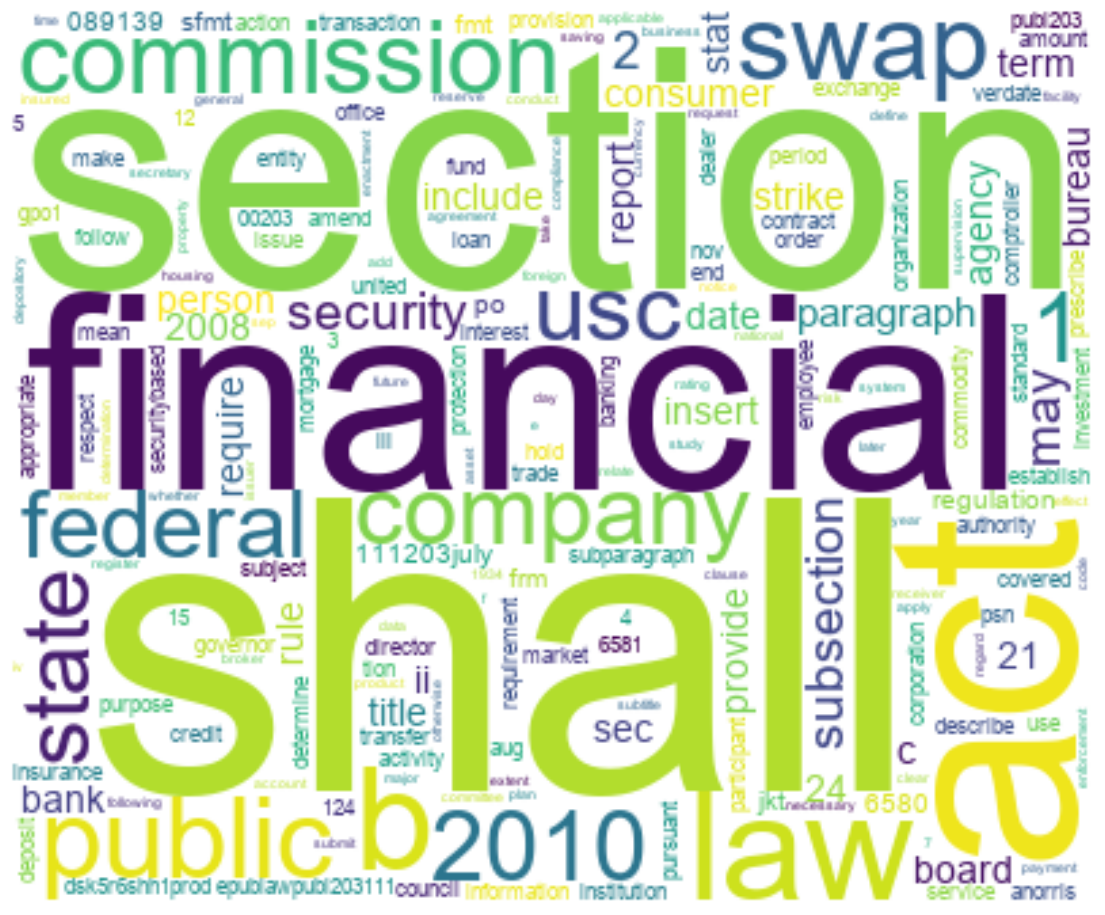

In [19]:
generate_wordcloud(word_freq)

In [20]:
cleaned_us_text = cleaned_us_text  # from your preprocessing step

# Save as CSV file
df = pd.DataFrame([cleaned_us_text], columns=["cleaned_text"])
df.to_csv(r"cleaned_law\cleaned_us_law.csv", index=False)

print('file saved successfully')

file saved successfully


UK REGULATION

In [21]:
import fitz  
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Increase spaCy's max_length limit
nlp.max_length = 3_000_000

# Extract text from the PDF using PyMuPDF
doc = fitz.open(r"fintech_laws\UK.pdf")
text = "\n".join([page.get_text() for page in doc])
doc.close()

# Tokenization using spaCy
doc = nlp(text)
tokens = [token.text for token in doc]

# Print tokens
print(tokens[:1000])

['DIRECTIVES', '\n', 'DIRECTIVE', '(', 'EU', ')', '2015/2366', 'OF', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'OF', 'THE', 'COUNCIL', '\n', 'of', '25', 'November', '2015', '\n', 'on', 'payment', 'services', 'in', 'the', 'internal', 'market', ',', 'amending', 'Directives', '2002/65', '/', 'EC', ',', '2009/110', '/', 'EC', 'and', '\n', '2013/36', '/', 'EU', 'and', 'Regulation', '(', 'EU', ')', 'No', '1093/2010', ',', 'and', 'repealing', 'Directive', '2007/64', '/', 'EC', '\n', '(', 'Text', 'with', 'EEA', 'relevance', ')', '\n', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'THE', 'COUNCIL', 'OF', 'THE', 'EUROPEAN', 'UNION', ',', '\n', 'Having', 'regard', 'to', 'the', 'Treaty', 'on', 'the', 'Functioning', 'of', 'the', 'European', 'Union', ',', 'and', 'in', 'particular', 'Article', '114', 'thereof', ',', '\n', 'Having', 'regard', 'to', 'the', 'proposal', 'from', 'the', 'European', 'Commission', ',', '\n', 'After', 'transmission', 'of', 'the', 'draft', 'legislative', 'act', 'to', 'the', 'national'

In [22]:
# tokens as string
print([token.text for token in doc][:1000])

['DIRECTIVES', '\n', 'DIRECTIVE', '(', 'EU', ')', '2015/2366', 'OF', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'OF', 'THE', 'COUNCIL', '\n', 'of', '25', 'November', '2015', '\n', 'on', 'payment', 'services', 'in', 'the', 'internal', 'market', ',', 'amending', 'Directives', '2002/65', '/', 'EC', ',', '2009/110', '/', 'EC', 'and', '\n', '2013/36', '/', 'EU', 'and', 'Regulation', '(', 'EU', ')', 'No', '1093/2010', ',', 'and', 'repealing', 'Directive', '2007/64', '/', 'EC', '\n', '(', 'Text', 'with', 'EEA', 'relevance', ')', '\n', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'THE', 'COUNCIL', 'OF', 'THE', 'EUROPEAN', 'UNION', ',', '\n', 'Having', 'regard', 'to', 'the', 'Treaty', 'on', 'the', 'Functioning', 'of', 'the', 'European', 'Union', ',', 'and', 'in', 'particular', 'Article', '114', 'thereof', ',', '\n', 'Having', 'regard', 'to', 'the', 'proposal', 'from', 'the', 'European', 'Commission', ',', '\n', 'After', 'transmission', 'of', 'the', 'draft', 'legislative', 'act', 'to', 'the', 'national'

comparing whitespace and spaCy tokenizer

In [23]:
# whitespace tokenizer 
print(text.split()[:1000])

# spacy tokenizer 
print([token.text for token in doc][:1000])

['DIRECTIVES', 'DIRECTIVE', '(EU)', '2015/2366', 'OF', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'OF', 'THE', 'COUNCIL', 'of', '25', 'November', '2015', 'on', 'payment', 'services', 'in', 'the', 'internal', 'market,', 'amending', 'Directives', '2002/65/EC,', '2009/110/EC', 'and', '2013/36/EU', 'and', 'Regulation', '(EU)', 'No', '1093/2010,', 'and', 'repealing', 'Directive', '2007/64/EC', '(Text', 'with', 'EEA', 'relevance)', 'THE', 'EUROPEAN', 'PARLIAMENT', 'AND', 'THE', 'COUNCIL', 'OF', 'THE', 'EUROPEAN', 'UNION,', 'Having', 'regard', 'to', 'the', 'Treaty', 'on', 'the', 'Functioning', 'of', 'the', 'European', 'Union,', 'and', 'in', 'particular', 'Article', '114', 'thereof,', 'Having', 'regard', 'to', 'the', 'proposal', 'from', 'the', 'European', 'Commission,', 'After', 'transmission', 'of', 'the', 'draft', 'legislative', 'act', 'to', 'the', 'national', 'parliaments,', 'Having', 'regard', 'to', 'the', 'opinion', 'of', 'the', 'European', 'Central', 'Bank', '(', '1', '),', 'Having', 'regar

In [24]:
# no. of tokens in whitespace tokenizer
print(len(text.split()))

#no. of tokens in spacy's tokenizer
print(len(doc))

49374
61466


In [25]:
import re
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Use TextBlob for part-of-speech tagging and lemmatization
    blob = TextBlob(text)
    
    lemmatized_words = []
    for word, tag in blob.tags:
        # We need to convert the TextBlob POS tag to a WordNet POS tag
        if tag.startswith('J'):
            pos = 'a'  # Adjective
        elif tag.startswith('V'):
            pos = 'v'  # Verb
        elif tag.startswith('N'):
            pos = 'n'  # Noun
        elif tag.startswith('R'):
            pos = 'r'  # Adverb
        else:
            pos = 'n'  # Default to noun
            
        lemmatized_word = Word(word).lemmatize(pos)
        lemmatized_words.append(lemmatized_word)

    # Remove stopwords
    filtered_words = [word for word in lemmatized_words if word not in stop_words]
    
    return ' '.join(filtered_words)

In [26]:
# cleaning text 
cleaned_uk_text = clean_text(text)

NAME ENTITY RECOGNITION

In [27]:
# Run NER for UK cleaned text and save (uses extract_ner_entities defined earlier)
uk_entities = extract_ner_entities(cleaned_uk_text, top_n=50)
print(uk_entities.head(50))
uk_entities.to_csv(r'cleaned_law\cleaned_uk_entities.csv', index=False)
print('Saved UK entities to cleaned_law\cleaned_uk_entities.csv')

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sneha\AppData\Local\Temp\ipykernel_27504\1953865354.py:5: SyntaxWarning: invalid escape sequence '\c'
  print('Saved UK entities to cleaned_law\cleaned_uk_entities.csv')


                         entity     label  count
0                             1  CARDINAL    171
1                             2  CARDINAL    102
2                             3  CARDINAL     71
3                      23122015      DATE     56
4                european union       ORG     40
5                             4  CARDINAL     39
6              european union l       ORG     36
7                             5  CARDINAL     32
8                         first   ORDINAL     32
9                      10932010      DATE     28
10                     european      NORP     27
11                          one  CARDINAL     24
12                           13  CARDINAL     18
13                            6  CARDINAL     17
14  european parliament council       ORG     16
15                            7  CARDINAL     13
16      european union 23122015       ORG     13
17                 january 2018      DATE     12
18                            8  CARDINAL     12
19                  

In [28]:
import spacy 

nlp = spacy.load('en_core_web_sm')

doc = nlp(cleaned_uk_text)

In [29]:
words_dict = {}

# add word count pair to dictionary 
for token in doc:
    #cheacking if the word is already in dictionary or not 
    if token.text in words_dict:
        #increment count of word by 1 
        words_dict[token.text] = words_dict[token.text] + 1
    else:
        # add the word in the dictionary with count 1 
        words_dict[token.text] = 1

In [30]:
import pandas as pd 

# creating a dataframe from dictionary 
df = pd.DataFrame({'word': list(words_dict.keys()), 'count': list(words_dict.values())})

# sorting dataframe in decending order 
df.sort_values(by='count', ascending= False, inplace= True, ignore_index= True)

print('Shapes=>', df.shape)

df.head(10)

Shapes=> (2621, 2)


,word,count
0,payment,1872
1,service,1178
2,article,1053
3,provider,583
4,shall,518
5,directive,363
6,transaction,341
7,state,317
8,member,315
9,provide,260


Generating word frequency

In [31]:
import pandas as pd

def gen_freq(tokens):
    # Convert spaCy tokens to strings using token.text
    words = [token.text for token in tokens]
    
    # Create a pandas series with word frequencies
    word_freq = pd.Series(words).value_counts()
 
    # Print the top 20 frequencies
    print(word_freq[:20])
 
    return word_freq

In [32]:
# getting word frequency 
word_freq = gen_freq(doc)

payment        1872
service        1178
article        1053
provider        583
shall           518
directive       363
transaction     341
state           317
member          315
provide         260
account         258
payer           256
information     255
institution     248
1               242
authority       235
user            220
european        212
competent       200
2               174
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

def generate_wordcloud(data):
    # specify a font path 
    wc = WordCloud(
        width=400,
        height=330,
        max_words=200,
        background_color='white',
        font_path="arial.ttf"
    ).generate_from_frequencies(data)

    # set figure size
    plt.figure(figsize=(14, 12))

    # display the wordcloud
    plt.imshow(wc, interpolation= 'bilinear')

    #remove axes
    plt.axis("off")
    plt.show() 

In [34]:
print('No. of unique words =>', len(word_freq))

No. of unique words => 2621


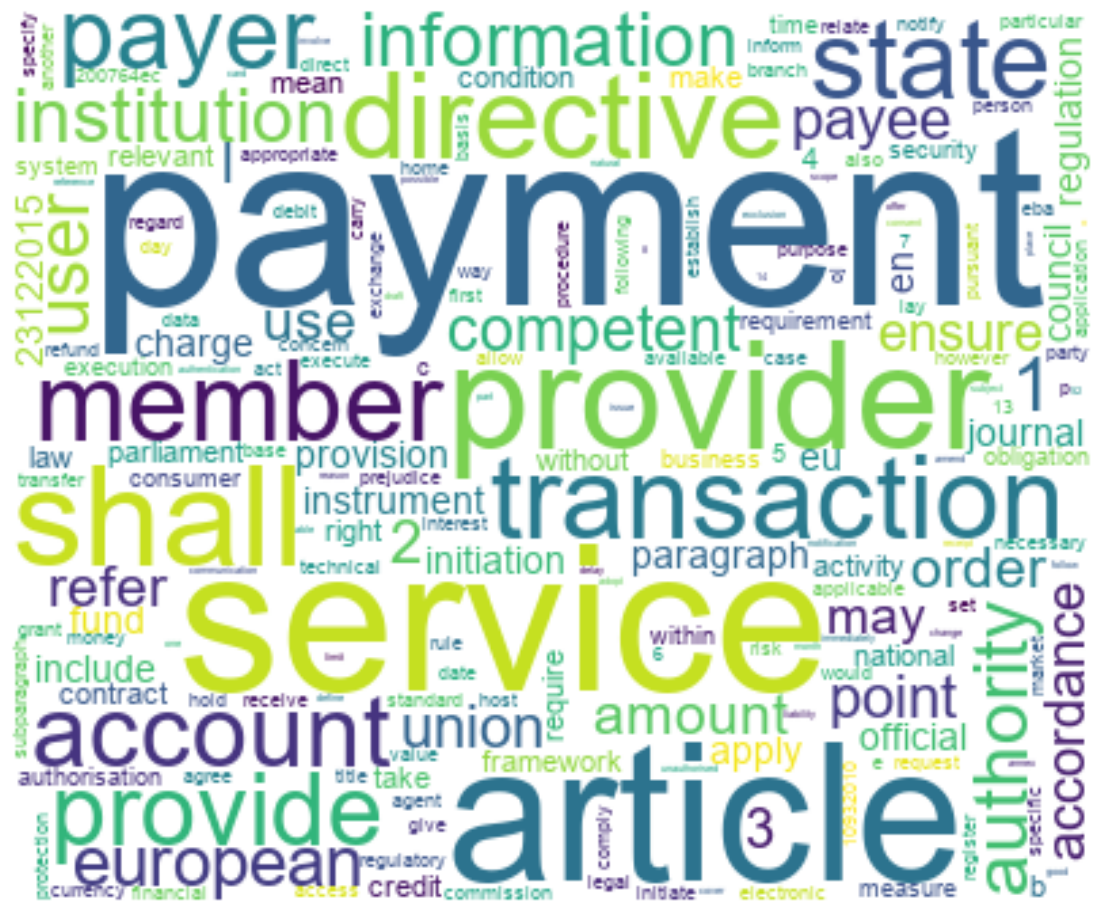

In [35]:
generate_wordcloud(word_freq)

In [36]:
cleaned__text = cleaned_uk_text  # from your preprocessing step

# Save as CSV file
df = pd.DataFrame([cleaned__text], columns=["cleaned_text"])
df.to_csv(r"cleaned_law\cleaned_uk_law.csv", index=False)

print('file saved successfully')

file saved successfully


INDIA REGULATION

In [37]:
import fitz  
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Increase spaCy's max_length limit
nlp.max_length = 2_000_000

# Extract text from the PDF using PyMuPDF
doc = fitz.open(r"fintech_laws\India.pdf")
text = "\n".join([page.get_text() for page in doc])
doc.close()

# Tokenization using spaCy
doc = nlp(text)
tokens = [token.text for token in doc]

# Print tokens
print(tokens[:1000])


['1', '\n \n', 'THE', 'PAYMENT', 'AND', 'SETTLEMENT', 'SYSTEMS', 'ACT', ',', '2007', '\n', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '\n', 'ARRANGEMENT', 'OF', 'SECTIONS', '\n', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '\n', 'CHAPTER', 'I', '\n', 'PRELIMINARY', '\n', 'SECTIONS', '\n', '1', '.', 'Short', 'title', ',', 'extent', 'and', 'commencement', '.', '\n', '2', '.', 'Definitions', '.', '\n \n', 'CHAPTER', 'II', '\n', 'DESIGNATED', 'AUTHORITY', ' \n', '3', '.', 'Designated', 'authority', '.', '\n \n', 'CHAPTER', 'III', '\n', 'AUTHORISATION', 'OF', 'PAYMENT', 'SYSTEMS', '\n', '4', '.', 'Payment', 'system', 'not', 'to', 'operate', 'without', 'authorisation', '.', '\n', '5', '.', 'Application', 'for', 'authorisation', '.', '\n', '6', '.', 'Inquiry', 'by', 'the', 'Reserve', 'Bank', '.', '\n', '7', '.', 'Issue', 'or', 'refusal', 'of', 'authorisation', '.', '\n', '8', '.', 'Revocation', 'of', 'authorisation', '.', '\n', '9', '.', 'Appeal', 'to', 'the',

In [38]:
#tokens as string 
print([token.text for token in doc][:1000])

['1', '\n \n', 'THE', 'PAYMENT', 'AND', 'SETTLEMENT', 'SYSTEMS', 'ACT', ',', '2007', '\n', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '\n', 'ARRANGEMENT', 'OF', 'SECTIONS', '\n', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '\n', 'CHAPTER', 'I', '\n', 'PRELIMINARY', '\n', 'SECTIONS', '\n', '1', '.', 'Short', 'title', ',', 'extent', 'and', 'commencement', '.', '\n', '2', '.', 'Definitions', '.', '\n \n', 'CHAPTER', 'II', '\n', 'DESIGNATED', 'AUTHORITY', ' \n', '3', '.', 'Designated', 'authority', '.', '\n \n', 'CHAPTER', 'III', '\n', 'AUTHORISATION', 'OF', 'PAYMENT', 'SYSTEMS', '\n', '4', '.', 'Payment', 'system', 'not', 'to', 'operate', 'without', 'authorisation', '.', '\n', '5', '.', 'Application', 'for', 'authorisation', '.', '\n', '6', '.', 'Inquiry', 'by', 'the', 'Reserve', 'Bank', '.', '\n', '7', '.', 'Issue', 'or', 'refusal', 'of', 'authorisation', '.', '\n', '8', '.', 'Revocation', 'of', 'authorisation', '.', '\n', '9', '.', 'Appeal', 'to', 'the',

comparing whitespaces and spaCy tokenizer 

In [39]:
# whitespace tokenizer 
print(text.split()[:1000])

#spacy tokenizer 
print([token.text for token in doc][:1000])

['1', 'THE', 'PAYMENT', 'AND', 'SETTLEMENT', 'SYSTEMS', 'ACT,', '2007', '____________', 'ARRANGEMENT', 'OF', 'SECTIONS', '____________', 'CHAPTER', 'I', 'PRELIMINARY', 'SECTIONS', '1.', 'Short', 'title,', 'extent', 'and', 'commencement.', '2.', 'Definitions.', 'CHAPTER', 'II', 'DESIGNATED', 'AUTHORITY', '3.', 'Designated', 'authority.', 'CHAPTER', 'III', 'AUTHORISATION', 'OF', 'PAYMENT', 'SYSTEMS', '4.', 'Payment', 'system', 'not', 'to', 'operate', 'without', 'authorisation.', '5.', 'Application', 'for', 'authorisation.', '6.', 'Inquiry', 'by', 'the', 'Reserve', 'Bank.', '7.', 'Issue', 'or', 'refusal', 'of', 'authorisation.', '8.', 'Revocation', 'of', 'authorisation.', '9.', 'Appeal', 'to', 'the', 'Central', 'Government.', 'CHAPTER', 'IV', 'REGULATION', 'AND', 'SUPERVISION', 'BY', 'THE', 'RESERVE', 'BANK', '10.', 'Power', 'to', 'determine', 'standards.', '10A.', 'Bank,', 'etc.,', 'not', 'to', 'impose', 'charge', 'for', 'using', 'electronic', 'modes', 'of', 'payment.', '11.', 'Notice', 

In [40]:
# no. of tokens in whitespace tokenizer 
print(len(text.split()))

# no. of tokens in spacy's tokenizer 
print(len(doc))

9704
12337


Cleaning the text

In [41]:
import re
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Use TextBlob for part-of-speech tagging and lemmatization
    blob = TextBlob(text)
    
    lemmatized_words = []
    for word, tag in blob.tags:
        # We need to convert the TextBlob POS tag to a WordNet POS tag
        if tag.startswith('J'):
            pos = 'a'  # Adjective
        elif tag.startswith('V'):
            pos = 'v'  # Verb
        elif tag.startswith('N'):
            pos = 'n'  # Noun
        elif tag.startswith('R'):
            pos = 'r'  # Adverb
        else:
            pos = 'n'  # Default to noun
            
        lemmatized_word = Word(word).lemmatize(pos)
        lemmatized_words.append(lemmatized_word)

    # Remove stopwords
    filtered_words = [word for word in lemmatized_words if word not in stop_words]
    
    return ' '.join(filtered_words)

In [42]:
# cleaning text 
cleaned_india_text = clean_text(text)

NAME ENTITY RECOGNITION

In [43]:
# Run NER for India cleaned text and save
india_entities = extract_ner_entities(cleaned_india_text, top_n=50)
print(india_entities.head(50))
india_entities.to_csv(r'cleaned_law\cleaned_india_entities.csv', index=False)
print('Saved India entities to cleaned_law\cleaned_india_entities.csv')

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sneha\AppData\Local\Temp\ipykernel_27504\2050455789.py:5: SyntaxWarning: invalid escape sequence '\c'
  print('Saved India entities to cleaned_law\cleaned_india_entities.csv')


                                       entity     label  count
0                                           2  CARDINAL     39
1                                           1  CARDINAL     23
2                                           3  CARDINAL     22
3                                           4  CARDINAL     13
4                                           6  CARDINAL      9
5                                1949 10 1949      DATE      8
6                                         one  CARDINAL      7
7                                           5  CARDINAL      6
8                          power reserve bank       ORG      6
9                                   section 5       LAW      6
10                                 thirty day      DATE      5
14                                         26  CARDINAL      4
16                                       2016      DATE      4
15                                1956 1 1956      DATE      4
11                                          7  CARDINAL

Finding the most frequent words in the text 

In [44]:
import spacy 

nlp = spacy.load('en_core_web_sm')

nlp.max_length = 2_000_000

doc = nlp(cleaned_india_text)

In [45]:
words_dict = {}

# add word count pair to dictionary 
for token in doc:
    # checking if the word is already in dictionary or not 
    if token.text in words_dict:
        # increment count of word by 1 
        words_dict[token.text] = words_dict[token.text] + 1
    else:
        # add the word in the dictionary with count 1 
        words_dict[token.text] = 1

In [46]:
import pandas as pd

# creating a dataframe from dictionary 
df = pd.DataFrame({'word': list(words_dict.keys()), 'count': list(words_dict.values())})

# sorting dataframe in decending order 
df.sort_values(by='count', ascending= False, inplace= True, ignore_index= True)

print('Shapes=>', df.shape)

df.head(10)

Shapes=> (938, 2)


,word,count
0,system,194
1,bank,154
2,shall,135
3,reserve,126
4,payment,126
5,act,126
6,may,99
7,section,69
8,2,63
9,person,58


Generating word frequency 

In [47]:
import pandas as pd

def gen_freq(tokens):
    # Convert spaCy tokens to strings using token.text
    words = [token.text for token in tokens]
    
    # Create a pandas series with word frequencies
    word_freq = pd.Series(words).value_counts()
 
    # Print the top 20 frequencies
    print(word_freq[:20])
 
    return word_freq

In [48]:
# getting word frequency 
word_freq = gen_freq(doc)

system           194
bank             154
shall            135
reserve          126
payment          126
act              126
may               99
section           69
2                 63
person            58
provider          52
regulation        49
time              49
make              47
subsection        43
provision         39
participant       39
1                 37
authorisation     34
settlement        34
Name: count, dtype: int64


In [49]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

def generate_wordcloud(data):
    # specify a font path 
    wc = WordCloud(
        width=400,
        height=330,
        max_words=200,
        background_color='white',
        font_path="arial.ttf"
    ).generate_from_frequencies(data)

    # set figure size 
    plt.figure(figsize=(14,12))

    # display the wordcloud 
    plt.imshow(wc, interpolation= 'bilinear')

    # remove axes 
    plt.axis("off")
    plt.show()

In [50]:
print('No. of unique words =>', len(word_freq))

No. of unique words => 938


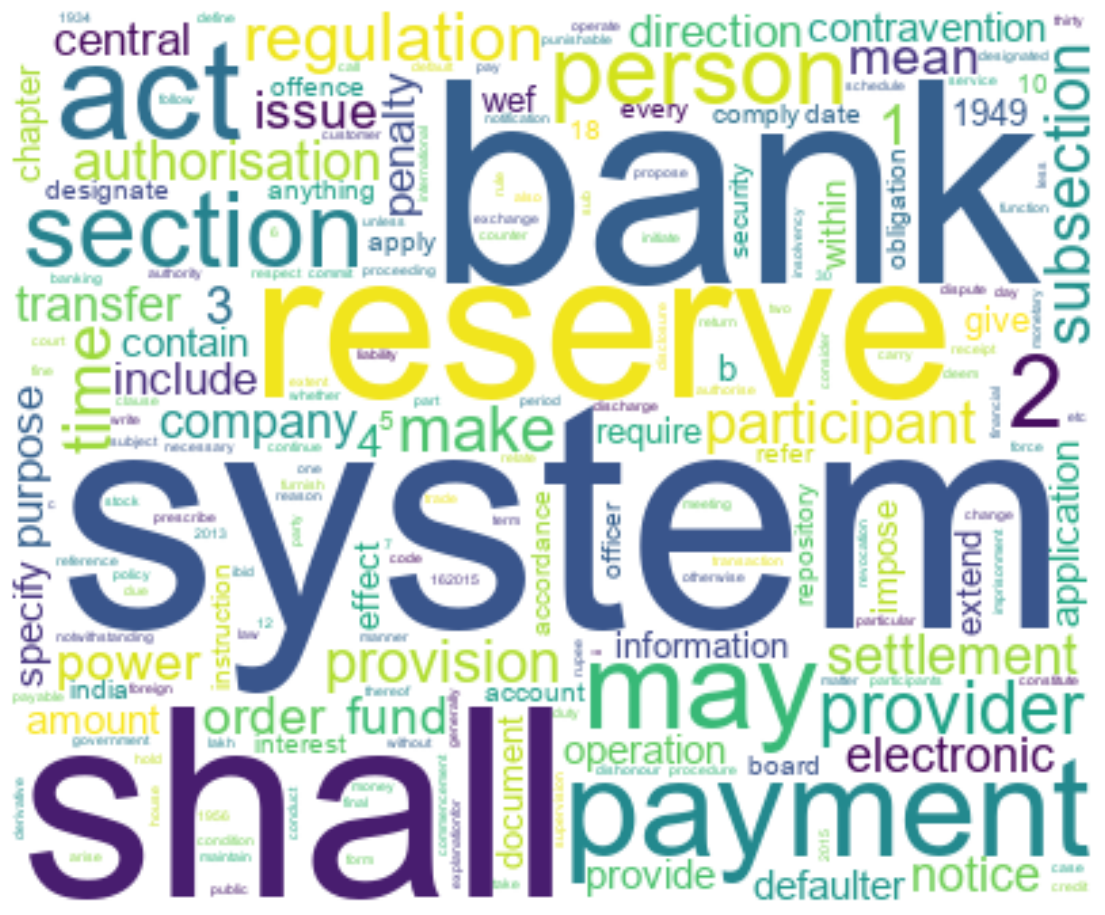

In [51]:
generate_wordcloud(word_freq)

In [52]:
cleaned_text = cleaned_india_text 

df = pd.DataFrame([cleaned_text], columns=["cleaned_text"])
df.to_csv(r"cleaned_law\cleaned_india_law.csv", index=False)

print('file saved successfully')

file saved successfully


## NER Comparison across countries
This cell aggregates the NER outputs saved in `cleaned_law` for India, UK and US, writes `scripts/ner_comparison.csv` and shows a summary table and a bar plot.

In [59]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

ROOT = Path().resolve()
DATA_DIR = ROOT / 'cleaned_law'
OUT_DIR = ROOT / 'scripts'
OUT_DIR.mkdir(parents=True, exist_ok=True)

files = {
    'India': DATA_DIR / 'cleaned_india_entities.csv',
    'UK': DATA_DIR / 'cleaned_uk_entities.csv',
    'US': DATA_DIR / 'us_entities.csv',
}

def read_counts(path: Path) -> dict:
    if not path.exists():
        return {}
    df = pd.read_csv(path, header=0, names=['entity','label','count'])
    df['count'] = pd.to_numeric(df['count'], errors='coerce').fillna(0).astype(int)
    return df.groupby('label')['count'].sum().to_dict()

per_country = {c: read_counts(p) for c, p in files.items()}
labels = sorted({lab for d in per_country.values() for lab in d.keys()})
rows = []
for lab in labels:
    i = per_country.get('India', {}).get(lab, 0)
    u = per_country.get('UK', {}).get(lab, 0)
    s = per_country.get('US', {}).get(lab, 0)
    rows.append({'Label': lab, 'India': i, 'UK': u, 'US': s, 'Total': i + u + s})

comp_df = pd.DataFrame(rows).sort_values('Total', ascending=False).reset_index(drop=True)
csv_path = OUT_DIR / 'ner_comparison.csv'
md_path = OUT_DIR / 'ner_comparison.md'
comp_df.to_csv(csv_path, index=False)
# write markdown table
md_lines = ['| Label | India | UK | US | Total |', '|---:|---:|---:|---:|---:|']
for _, r in comp_df.iterrows():
    md_lines.append(f"| {r['Label']} | {r['India']} | {r['UK']} | {r['US']} | {r['Total']} |")
md_path.write_text('
'.join(md_lines), encoding='utf-8')

print('Wrote:', csv_path)
print('Wrote:', md_path)

# display top labels
display(comp_df.head(30))

# quick plot
top = comp_df.head(15).set_index('Label')
ax = top[['India','UK','US']].plot(kind='bar', figsize=(10,6))
ax.set_ylabel('Count')
ax.set_title('Top 15 NER labels by country')
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 40) (818345095.py, line 40)

# TF-IDF Vectorization


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load cleaned CSV files
df_india = pd.read_csv(r"cleaned_law\cleaned_india_law.csv")
df_uk = pd.read_csv(r"cleaned_law\cleaned_uk_law.csv")
df_us = pd.read_csv(r"cleaned_law\cleaned_us_law.csv")

# Step 2: Extract and join text (assuming cleaned text is in the first column)
text_india = " ".join(df_india["cleaned_text"].astype(str).tolist())
text_uk = " ".join(df_uk["cleaned_text"].astype(str).tolist())
text_us = " ".join(df_us["cleaned_text"].astype(str).tolist())

# Step 3: TF-IDF vectorization
documents = [text_india, text_uk, text_us]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Optional: View TF-IDF matrix as DataFrame (rows=docs, cols=words)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=["India", "UK", "US"], columns=vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n")
print(tfidf_df)

TF-IDF Matrix:

            000     00000     00001     00002     00003     00004     00005  \
India  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
UK     0.001643  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
US     0.000000  0.011425  0.000114  0.000114  0.000114  0.000114  0.000114   

          00006     00007     00008  ...  yearsnot       yes       yet  \
India  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
UK     0.000000  0.000000  0.000000  ...  0.000000  0.000548  0.000833   
US     0.000114  0.000114  0.000114  ...  0.000114  0.000000  0.000869   

          yield      york     young      ysis      zero      zine      zone  
India  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.002844  
UK     0.000000  0.000000  0.000000  0.000000  0.000548  0.000000  0.000000  
US     0.000685  0.000228  0.000114  0.000343  0.000000  0.000114  0.000348  

[3 rows x 12747 columns]


In [54]:
# Step 4: Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Step 5: Show cosine similarity matrix
cosine_df = pd.DataFrame(cosine_sim, index=["India", "UK", "US"], columns=["India", "UK", "US"])
print("\n Cosine Similarity Matrix:\n")
print(cosine_df)



 Cosine Similarity Matrix:

          India        UK        US
India  1.000000  0.362037  0.387634
UK     0.362037  1.000000  0.208907
US     0.387634  0.208907  1.000000


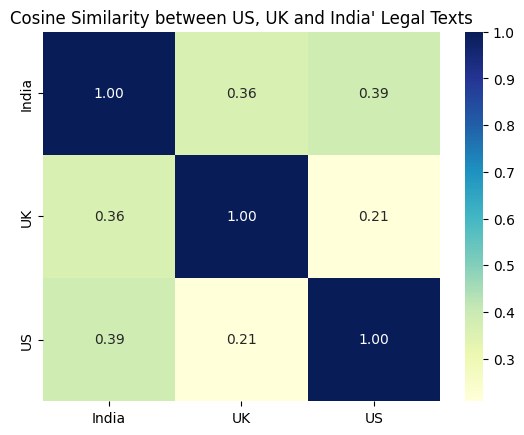

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cosine_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cosine Similarity between US, UK and India' Legal Texts")
plt.show()


# BERT

In [56]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine


model = SentenceTransformer('bert-base-nli-mean-tokens')

def get_embedding(text):
    return model.encode(text)


files = {
    "US": r"cleaned_law\cleaned_us_law.csv",
    "India": r"cleaned_law\cleaned_india_law.csv",
    "UK": r"cleaned_law\cleaned_uk_law.csv"
}

docs = {}
for country, file in files.items():
    df = pd.read_csv(file)
    docs[country] = " ".join(df['cleaned_text'].astype(str))


embeddings = {name: get_embedding(text) for name, text in docs.items()}

names = list(embeddings.keys())
print("\nSimilarity Matrix:")
for i in range(len(names)):
    row = []
    for j in range(len(names)):
        sim = 1 - cosine(embeddings[names[i]], embeddings[names[j]])
        row.append(f"{sim:.4f}")
    print(f"{names[i]:<6}: {'  '.join(row)}")

c:\Users\sneha\Documents\research\NLP-Driven-Comparative-Analysis-of-Fintech-Regulations\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 199/199 [00:00<00:00, 203.34it/s, Materializing param=pooler.dense.weight]                               
BertModel LOAD REPORT from: sentence-transformers/bert-base-nli-mean-tokens
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.



Similarity Matrix:
US    : 1.0000  0.7180  0.7510
India : 0.7180  1.0000  0.7087
UK    : 0.7510  0.7087  1.0000


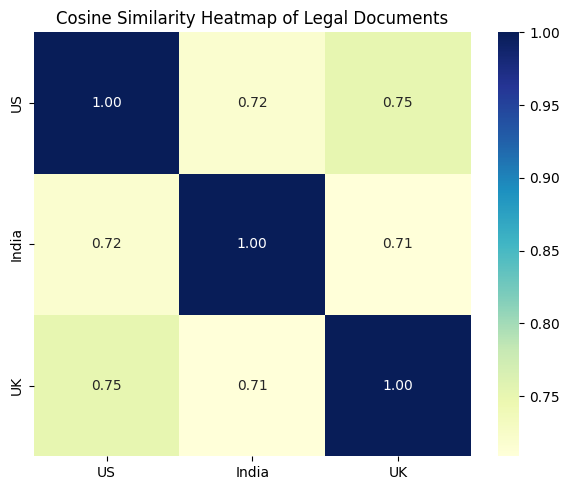

In [57]:
import seaborn as sns
import numpy as np

matrix = np.zeros((len(names), len(names)))
for i in range(len(names)):
	for j in range(len(names)):
		matrix[i, j] = 1 - cosine(embeddings[names[i]], embeddings[names[j]])

plt.figure(figsize=(6, 5))
sns.heatmap(matrix, xticklabels=names, yticklabels=names, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cosine Similarity Heatmap of Legal Documents")
plt.tight_layout()
plt.show()

# Sentiment Analysis

In [58]:
import fitz  
import nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_pdf(path, name):
    print(f"\nAnalyzing: {name}")
    try:
        # Extract text from PDF
        text = ""
        for page in fitz.open(path):
            text += page.get_text()
        sentences = nltk.sent_tokenize(text)
        if not sentences:
            print("No text found in PDF.")
            return
    except:
        print("Failed to read the PDF.")
        return

    
    sid = SentimentIntensityAnalyzer()
    pos, neg, neu = 0, 0, 0
    for s in sentences:
        score = sid.polarity_scores(s)['compound']
        if score >= 0.05:
            pos += 1
        elif score <= -0.05:
            neg += 1
        else:
            neu += 1

    total = len(sentences)
    print(f"Neutral:  {neu / total:.2%}")
    print(f"Positive: {pos / total:.2%}")
    print(f"Negative: {neg / total:.2%}")


pdfs = {
    "US Law": r"fintech_laws\USA.pdf",
    "India Law": r"fintech_laws\India.pdf",
    "UK Law": r"fintech_laws\UK.pdf"
}

for name, path in pdfs.items():
    analyze_pdf(path, name)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Analyzing: US Law
Neutral:  52.86%
Positive: 32.85%
Negative: 14.29%

Analyzing: India Law
Neutral:  66.87%
Positive: 19.88%
Negative: 13.25%

Analyzing: UK Law
Neutral:  40.23%
Positive: 45.06%
Negative: 14.70%
